In [11]:
import pandas as pd
import numpy as np

In [12]:
df= pd.read_csv('IMDB Dataset.csv')

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

### Convert into lower case 

In [15]:
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### Removing HTML tags
    


In [17]:
import re

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [18]:
### Let's check on random valus

t = df['review'][3].lower()

In [19]:
remove_html_tags(t)         #### Here you can see all the HTML tags removed

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [23]:
## Apply on main data

df['review']=df['review'].apply(remove_html_tags)
df

### Removed the HTML tags from all the data

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


### Remove URLs

In [44]:
text_1 = 'check out my note book https://course.masaischool.com/assignments'
text_2 = 'https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox'
text_3 = 'Hiii my name is sandeep https://www.kaggle.com/code/campusx/text-preprocessing/script'
text_4 = 'Google search here www.google.com'
text_5 = 'For notebook click https://www.kaggle.com/sandeepsingh/notebook895467asdf5adf to seach check www.google.com'

In [53]:
### 

def remove_url(text):
#     pattern = re.compile(r'https?://\S+/www\.\S+')
    pattern=re.compile(r'https?://\S+')
    return pattern.sub(r'',text)

In [54]:
remove_url(text_3)

## here removed Urls from text data

'Hiii my name is sandeep '

### Remove Punctuations

In [56]:
## punctuations in python

punc = '!"#$%&\'()*+,-./:;<=>?@[\\]'            ## These are the some puctuations

In [57]:
## When we do tokenization then puctuations create the noise or it convert into separate word 
## Ex. hello, !,how,are,you, ?   1. example
## Ex.2 hello!,how,are ,you?      ## so here both are different hello or hello! 
## That's why we remove the puctuations
  

## So like that it will separate out different word that's why we remove the puctuactions

In [58]:
import string,time

In [59]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
exclude = string.punctuation

In [61]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [64]:
text = 'Hey! i am sandeep what your name?. ok good to know.'                ### Random text

In [65]:
remove_punc(text)             ### Removed all the punctuation 

'Hey i am sandeep what your name ok good to know'

In [67]:
## Check how much time to take remove the punctuation
start=time.time()
print(remove_punc(text))
time1 = time.time()-start
print(time1*4000)

Hey i am sandeep what your name ok good to know
0.0


In [70]:
### Another technique

def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

In [71]:
remove_punc1(text)

'Hey i am sandeep what your name ok good to know'

In [72]:
### This method take less time

## Chat word treatment

In [73]:
## when we chat someone then we use shortcuts for example like Gn,Gm,Asap etc

## here we convert short words into full form
## Gn - Good Night, Asap - As soon as posible, Gm - Good morning
## For that dictionary


In [74]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [79]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.lower() in abbreviations:
            new_text.append(abbreviations[w.lower()])
        else:
            new_text.append(w)
    return ' '.join(new_text)

In [80]:
chat_conversion('IMHO he is the best')

'in my humble opinion he is the best'

In [82]:
chat_conversion('FYI he is the best')

'for your information he is the best'

In [81]:
### Like that you can change the short form into main normal words

## Spelling Correction

In [84]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [86]:
from textblob import TextBlob

In [90]:
## for example - please read the note book,and also like the notebook
## Here both are notebook are different when you tokenized the word the it will generate 3 different words like note,notebook,book

## There are some libraries like 'textblob' to check the where word is correct or not and then convet into right word

incorrect_text = 'ceertain conditionas during seveal ggenerations aree moodified in the saame maner.'
textBlb = TextBlob(incorrect_text)
textBlb.correct().string

'certain conditions during several generations are modified in the same manner.'

In [91]:
### Here automatic spealling correction done using this Textblob library

## Removing Stop words

In [ ]:
#### stops words means they use in sentance formation but they didnot help in meaning of the sentance
####  Example : a,the, of,are,my etc....
####   Using "NLTK library" we can esaily remove the stop words

#### NOTE : in POS tagging we are not removing Stop words

In [105]:
from nltk.corpus import stopwords


In [110]:
stop = stopwords.words('english')

In [111]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stop:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return ' '.join(x)

In [112]:
remove_stopwords('probably my all-time favorite movie,a story of selflessness,sacrifice and dedication to a noble cause,')

'probably  all-time favorite movie,a story  selflessness,sacrifice  dedication   noble cause,'

In [113]:
## here apply whole dataset

df['review']  = df['review'].apply(remove_stopwords)

In [115]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz e...,positive
1,wonderful little production. filming techniq...,positive
2,thought wonderful way spend time hot s...,positive
3,basically there's family little boy (jake) ...,negative
4,"petter mattei's ""love time money"" visuall...",positive


### Handle the Emojis

In [116]:
## 1.First method to remove the emojis
## 2. convert into their expression like happy,sad,confuse like 


In [121]:
def remove_emojis(text):
    emojis_pattern = re.compile(re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE))
    return emojis_pattern.sub(r'',text)

In [122]:
remove_emojis('Loved the movie.It was 😘😘')

'Loved the movie.It was '

In [124]:
remove_emojis('i am  😊😊')

'i am  '

In [126]:
# pip install emoji

     -------------------------------------- 240.9/240.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=c055263230209ba7a9d0b3c5de91b9d630c822f1cbb77d9d18567bc818383c12
  Stored in directory: c:\users\sunil\appdata\local\pip\cache\wheels\9a\b8\0f\f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [129]:
### Replace the emojis with words 
## There is one module in python 'emoji'
import emoji
print(emoji.demojize('Python is 🔥'))

Python is :fire:


In [130]:
## so here convert into name of emoji symbol

# Tokenization

In [131]:
## Tokenization is the breaking your text into smaller part that is called token

# Example : I am an Indian  token is here : ['I','am','an','Indian'] like that tokenized

## Why we need to tokenization
## So when we give the data to machine that time we have to convert into number format and then we give to the machine so for that we have to tokenized to the data carefully
## If we not tokenized the data well then our machine will confused and at then end accuracy of model is not well


## The major issue we face in tokenization is Prefix,suffix,infix,and exception 
## 

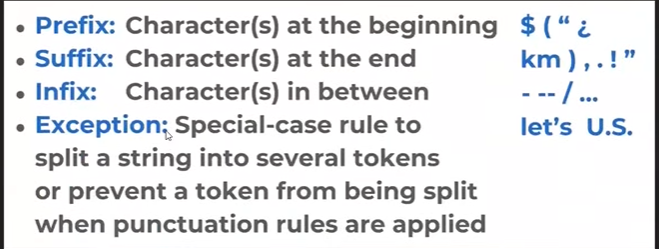

In [133]:
## Some example - 1. 20$ sepate 20  and $  
#                - 2. 10Km  sepate 10  and 'Km'
#                - 3. New-York   not remove - from there
#                - 4. U.s so not remove . this is full name like U.S
#                 - 5. let's so here  let and 's 


### 1. Using the Split Function

In [136]:
### When we have esay words then we can use split function

sent1 = ' I am going to Delhi'
sent1.split()

### this word wise tokenization

['I', 'am', 'going', 'to', 'Delhi']

In [138]:
sent1 = ' I am going to Delhi. I will stay there for 3 days.Let\'s hope the trip to be great'
sent1.split('.')


[' I am going to Delhi',
 ' I will stay there for 3 days',
 "Let's hope the trip to be great"]

In [139]:
### Complex tokenization
sent3 = ' I am going to Delhi!'
sent3.split()

['I', 'am', 'going', 'to', 'Delhi!']

In [140]:
## here Delhi! is defferent from Delhi when next time if delhi come then it's different from our Delhi! word
## So it will not handle this situation

## Using regular Expression

In [145]:
sent3 = ' I am going to Delhi!'
token = re.findall('[\w]+',sent3)
token         ### Remove the ! and then split 

['I', 'am', 'going', 'to', 'Delhi']

In [146]:
text = '''Now is the winter of our discontent
Made glorious summer by this sun of York;
And all the clouds that lour'd upon our house
In the deep bosom of the ocean buried.
Now are our brows bound with victorious wreaths;
Our bruised arms hung up for monuments;
Our stern alarums changed to merry meetings,
Our dreadful marches to delightful measures.
Grim-visaged war hath smooth'd his wrinkled front;
And now, instead of mounting barded steeds
To fright the souls of fearful adversaries,'''

In [148]:
sentance = re.compile('[.!?]').split(text)
sentance

["Now is the winter of our discontent\nMade glorious summer by this sun of York;\nAnd all the clouds that lour'd upon our house\nIn the deep bosom of the ocean buried",
 '\nNow are our brows bound with victorious wreaths;\nOur bruised arms hung up for monuments;\nOur stern alarums changed to merry meetings,\nOur dreadful marches to delightful measures',
 "\nGrim-visaged war hath smooth'd his wrinkled front;\nAnd now, instead of mounting barded steeds\nTo fright the souls of fearful adversaries,"]

In [149]:
### Also there are some problem in Regular Expression

### 3. Using NLTK

In [150]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [154]:
# nltk.download('punkt') ## Use for remove error use this first then next

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [156]:
sent1 = 'I am going to visit delhi!'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [157]:
word_tokenize(text)

['Now',
 'is',
 'the',
 'winter',
 'of',
 'our',
 'discontent',
 'Made',
 'glorious',
 'summer',
 'by',
 'this',
 'sun',
 'of',
 'York',
 ';',
 'And',
 'all',
 'the',
 'clouds',
 'that',
 'lour',
 "'d",
 'upon',
 'our',
 'house',
 'In',
 'the',
 'deep',
 'bosom',
 'of',
 'the',
 'ocean',
 'buried',
 '.',
 'Now',
 'are',
 'our',
 'brows',
 'bound',
 'with',
 'victorious',
 'wreaths',
 ';',
 'Our',
 'bruised',
 'arms',
 'hung',
 'up',
 'for',
 'monuments',
 ';',
 'Our',
 'stern',
 'alarums',
 'changed',
 'to',
 'merry',
 'meetings',
 ',',
 'Our',
 'dreadful',
 'marches',
 'to',
 'delightful',
 'measures',
 '.',
 'Grim-visaged',
 'war',
 'hath',
 'smooth',
 "'d",
 'his',
 'wrinkled',
 'front',
 ';',
 'And',
 'now',
 ',',
 'instead',
 'of',
 'mounting',
 'barded',
 'steeds',
 'To',
 'fright',
 'the',
 'souls',
 'of',
 'fearful',
 'adversaries',
 ',']

In [158]:
## Here you can see the tokenized very well so we use this one instead of split or Regular expression

In [159]:
sent1 = 'i have a Ph.D in A.I'
sent2 = "we're here to help! mail us at nks@gmail.com"
sent3 = "A 5Km ride cost $5.50"

In [161]:
## Let's see how the well work here

print(word_tokenize(sent1))
print(word_tokenize(sent2))
print(word_tokenize(sent3))


['i', 'have', 'a', 'Ph.D', 'in', 'A.I']
['we', "'re", 'here', 'to', 'help', '!', 'mail', 'us', 'at', 'nks', '@', 'gmail.com']
['A', '5Km', 'ride', 'cost', '$', '5.50']


In [162]:
### Here also some issue but better then regular expression

### 4. using Spacy

In [173]:
# !pip install spacy

In [170]:
## Using this library you can split into tokens
import spacy

In [171]:
nlp = spacy.load('en_core_web_sm')

In [174]:
doc1 = nlp(sent1)
doc2 = nlp(sent2)
doc3 = nlp(sent3)

In [177]:
for token in doc2:
    print(token)

we
're
here
to
help
!
mail
us
at
nks@gmail.com


In [178]:
### Here you can see words seperate properly 

In [179]:
for token in doc1:
    print(token)

i
have
a
Ph
.
D
in
A.I


# Stemming

In [180]:
### Stemming is basically convert the word (verb and many more) into base form 
## Example Walk,Walking,Walked,Walks        here Stemming convert into base form word like Walk

## For that we use here 'stem.porter in NLTK'

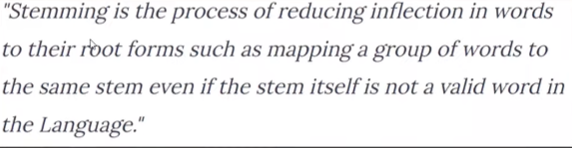

In [181]:
## Mostly use in Information Retrival System


In [182]:
from nltk.stem.porter import PorterStemmer

In [185]:
ps = PorterStemmer()
def stem_words(text):
    return ' '.join([ps.stem(word) for word in text.split()])

In [186]:
sample = ' walk walks walking walked'
stem_words(sample)

'walk walk walk walk'

In [187]:
### Here you can see the words convert into root form or base form

In [188]:
stem_words(text)

"now is the winter of our discont made gloriou summer by thi sun of york; and all the cloud that lour'd upon our hous in the deep bosom of the ocean buried. now are our brow bound with victori wreaths; our bruis arm hung up for monuments; our stern alarum chang to merri meetings, our dread march to delight measures. grim-visag war hath smooth'd hi wrinkl front; and now, instead of mount bard steed to fright the soul of fear adversaries,"

In [191]:
### Disadvantage : when we have a word that time stemming convert that words and that word not exist in real life or 
##there is no meaning of the words so that's why we use here Limitization

 


# Limitization

In [192]:
## Limitization output alway exist in english words
## Disadvantage of Limitization : It's a slow to compare the Stemming

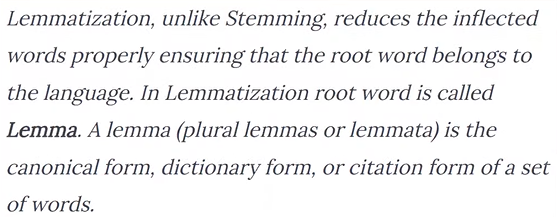

In [193]:
## For that we use 'WordNetLemmatizer dictinary'

## So our word check in this dictionary then find the word that's why it is slow and Stemming is based on the algorithm so it is fast

In [204]:
import nltk
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')

In [205]:
### Not Working

# wordnet_lemmatizer = WordNetLemmatizer()

# sentance = 'He was runing and eating at same time. He has bad habit swimming after playing long hours in th Sun.'

# punctuations = "?:!.,:"

# setance_word = nltk.word_tokenize(sentance)

# for word in setance_word:
#     if word in punctuations:
#         setance_word.remove(word)
        
# setance_word
# print("{0:20}{1:20}".format('Word',"Lemma"))

# for i in setance_word:
#     print("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

Word                Lemma               
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   
.                   .                   


In [208]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

sentence = 'He was running and eating at the same time. He has a bad habit of swimming after playing long hours in the sun.'
punctuations = "?:!.,:"
sentence_words = word_tokenize(sentence)

# Use a list comprehension to remove punctuation marks
sentence_words = [word for word in sentence_words if word not in punctuations]

print("{0:20}{1:20}".format('Word', 'Lemma'))

for word in sentence_words:
    print("{0:20}{1:20}".format(word, wordnet_lemmatizer.lemmatize(word,pos = 'v')))


Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
the                 the                 
same                same                
time                time                
He                  He                  
has                 have                
a                   a                   
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
sun                 sun                 


In [209]:
## When we use Lemmatizer and Stemming

# When we want to show the output to user then we have to use Lemmatizer and when we won't show the output to use then we use the Stemming


Create the dataset
perform text-preprossing


